In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
dataframe = pd.read_csv('Citywide_Mobility_Survey_-_Trip_Survey_2019.csv')
select_cols = ['person_id','travel_date_dow','trip_duration','d_purpose','d_purpose_category','mode_type']
selected_dataframe = dataframe[select_cols]


In [3]:
selected_dataframe[:5]


person_id  travel_date_dow  trip_duration  d_purpose  d_purpose_category  \
0  1900023501                4           11.1         10                   2   
1  1900023501                5            7.0      -9998               -9998   
2  1900023501                5           16.7      -9998               -9998   
3  1900023501                6            9.1          1                   1   
4  1900023501                6            4.4      -9998               -9998   

   mode_type  
0          6  
1        995  
2        995  
3          7  
4        995

In [5]:
#删除miss
for x in selected_dataframe.index:
    if selected_dataframe.loc[x,"d_purpose"] == -9998:
        selected_dataframe.drop(x, inplace=True)
        
        
for x in selected_dataframe.index:
    if selected_dataframe.loc[x,"d_purpose"] == 997:
        selected_dataframe.drop(x, inplace=True)
        
for x in selected_dataframe.index:
    if selected_dataframe.loc[x, "travel_date_dow"] == -9998:
        selected_dataframe.drop(x, inplace=True)



C:\Users\PC095\AppData\Local\Temp\ipykernel_18052\3877583243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dataframe.drop(x, inplace=True)
C:\Users\PC095\AppData\Local\Temp\ipykernel_18052\3877583243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dataframe.drop(x, inplace=True)
C:\Users\PC095\AppData\Local\Temp\ipykernel_18052\3877583243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_dataframe

In [19]:
#输出purpose.csv
selected_dataframe.to_csv('purpose.csv',index=False)
selected_dataframe[:5]


person_id  travel_date_dow  trip_duration  d_purpose  d_purpose_category  \
0   1900023501                4           11.1         10                   2   
3   1900023501                6            9.1          1                   1   
12  1900023501                7           17.9         50                   7   
13  1900023501                7           23.4         50                   7   
15  1900023501                1           13.7         50                   7   

    mode_type  
0           6  
3           7  
12          7  
13          7  
15          2

In [7]:
#read purpose.csv
purpose_dataframe = pd.read_csv('purpose.csv')
purpose_dataframe['d_purpose'] = purpose_dataframe['d_purpose'].map({1: 'Go home',
                                                                     10: 'Primary workplace',
                                                                     11: 'A work-related place',
                                                                     12: 'Travel for work',
                                                                     13: 'Volunteering',
                                                                     14: 'Other work-related',
                                                                     20: 'Daycare or preschool',
                                                                     21: 'K-12 school',
                                                                     22: 'College/university',
                                                                     24: 'Other education-related',
                                                                     33: 'Appointment/shopping/errands',
                                                                     40: 'To/from childcare/preschool/babysitter',
                                                                     41: 'To/from k-12 school or college',
                                                                     42: 'To/from other persons workplace',
                                                                     43: 'To/from other person s scheduled activity',
                                                                     44: 'Other place to pick-up/drop-off',
                                                                     50: 'Dine out/get coffee or take-out',
                                                                     51: 'Exercise',
                                                                     60: 'Change/transfer travel mode',
                                                                     63: 'Social/religious/leisure activity',
                                                                     100: 'To/from other person s home'}).astype(str)

purpose_dataframe['mode_type'] = purpose_dataframe['mode_type'].map({1: 'For-Hire Vehicle',
                                                                    2: 'App-Based For-Hire Vehicle',
                                                                    3: 'Commuter Rail',
                                                                    4: 'Bus',
                                                                    5: 'Ferry',
                                                                    6: 'Subway',
                                                                    7: 'Vehicle',
                                                                    8: 'Bike',
                                                                    9: 'Walk',
                                                                    10: 'Other',
                                                                    }).astype(str)

purpose_dataframe['d_purpose_category'] = purpose_dataframe['d_purpose_category'].map({1: 'Home',
                                                                    2: 'Work',
                                                                    3: 'Work-related',
                                                                    4: 'School',
                                                                    5: 'Escort',
                                                                    6: 'Shop',
                                                                    7: 'Meal',
                                                                    8: 'Social/Recreation',
                                                                    9: 'Errand/Other',
                                                                    10: 'Change mode',
                                                                    11:' Other (Unknown)',
                                                                     }).astype(str)


In [27]:
purpose_dataframe[:10]

person_id  travel_date_dow  trip_duration  \
0  1900023501                4           11.1   
1  1900023501                6            9.1   
2  1900023501                7           17.9   
3  1900023501                7           23.4   
4  1900023501                1           13.7   
5  1900023501                1           10.3   
6  1900023501                1            4.1   
7  1900023501                2            3.0   
8  1900023501                3           16.5   
9  1900023501                3           11.8   

                         d_purpose d_purpose_category  \
0                Primary workplace               Work   
1                          Go home               Home   
2  Dine out/get coffee or take-out               Meal   
3  Dine out/get coffee or take-out               Meal   
4  Dine out/get coffee or take-out               Meal   
5  Dine out/get coffee or take-out               Meal   
6     Appointment/shopping/errands               Shop   
7  Dine out/get coffee or take-out               Meal   
8  Dine out/get coffee or take-out               Meal   
9  Dine out/get coffee or take-out               Meal   

                    mode_type  
0                      Subway  
1                     Vehicle  
2                     Vehicle  
3                     Vehicle  
4  App-Based For-Hire Vehicle  
5  App-Based For-Hire Vehicle  
6                        Walk  
7  App-Based For-Hire Vehicle  
8  App-Based For-Hire Vehicle  
9  App-Based For-Hire Vehicle

In [18]:
deleted_person=purpose_dataframe.drop('person_id', axis=1)
deleted_person[:10]

travel_date_dow  trip_duration                        d_purpose  \
0                4           11.1                Primary workplace   
1                6            9.1                          Go home   
2                7           17.9  Dine out/get coffee or take-out   
3                7           23.4  Dine out/get coffee or take-out   
4                1           13.7  Dine out/get coffee or take-out   
5                1           10.3  Dine out/get coffee or take-out   
6                1            4.1     Appointment/shopping/errands   
7                2            3.0  Dine out/get coffee or take-out   
8                3           16.5  Dine out/get coffee or take-out   
9                3           11.8  Dine out/get coffee or take-out   

  d_purpose_category                   mode_type  
0               Work                      Subway  
1               Home                     Vehicle  
2               Meal                     Vehicle  
3               Meal                     Vehicle  
4               Meal  App-Based For-Hire Vehicle  
5               Meal  App-Based For-Hire Vehicle  
6               Shop                        Walk  
7               Meal  App-Based For-Hire Vehicle  
8               Meal  App-Based For-Hire Vehicle  
9               Meal  App-Based For-Hire Vehicle

In [29]:

res = deleted_person
df_purpose = res.d_purpose
res = res.drop('d_purpose',axis=1)
res.insert(0,'d_purpose',df_purpose)

res.head()


d_purpose  travel_date_dow  trip_duration  \
0                Primary workplace                4           11.1   
1                          Go home                6            9.1   
2  Dine out/get coffee or take-out                7           17.9   
3  Dine out/get coffee or take-out                7           23.4   
4  Dine out/get coffee or take-out                1           13.7   

  d_purpose_category                   mode_type  
0               Work                      Subway  
1               Home                     Vehicle  
2               Meal                     Vehicle  
3               Meal                     Vehicle  
4               Meal  App-Based For-Hire Vehicle

In [25]:
import matplotlib.pyplot as plt
#dataframe[‘first_column’].corr(dataframe[‘second_column’])
selected_dataframe['d_purpose'].corr(selected_dataframe['travel_date_dow'])

#pandas.corr 计算列之间的相关系列
plt.figure(figsize=(15, 10))
demo=selected_dataframe.corr()

<Figure size 1500x1000 with 0 Axes>

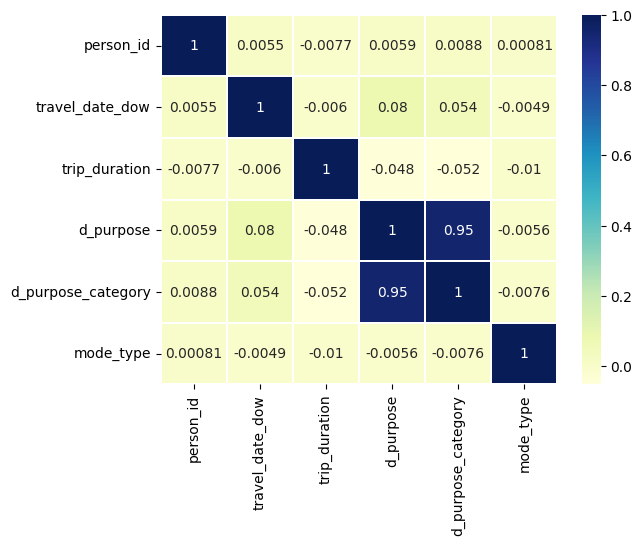

In [33]:
#print(selected_dataframe.corr())
sns.heatmap(demo, linewidth=.02, cmap="YlGnBu", annot=True)
plt.show()


In [16]:

arr1_transpose = deleted_person.transpose()
arr1_transpose[:10]


0        1      \
travel_date_dow                     4        6   
trip_duration                    11.1      9.1   
d_purpose           Primary workplace  Go home   
d_purpose_category               Work     Home   
mode_type                      Subway  Vehicle   

                                              2      \
travel_date_dow                                   7   
trip_duration                                  17.9   
d_purpose           Dine out/get coffee or take-out   
d_purpose_category                             Meal   
mode_type                                   Vehicle   

                                              3      \
travel_date_dow                                   7   
trip_duration                                  23.4   
d_purpose           Dine out/get coffee or take-out   
d_purpose_category                             Meal   
mode_type                                   Vehicle   

                                              4      \
travel_date_dow                                   1   
trip_duration                                  13.7   
d_purpose           Dine out/get coffee or take-out   
d_purpose_category                             Meal   
mode_type                App-Based For-Hire Vehicle   

                                              5      \
travel_date_dow                                   1   
trip_duration                                  10.3   
d_purpose           Dine out/get coffee or take-out   
d_purpose_category                             Meal   
mode_type                App-Based For-Hire Vehicle   

                                           6      \
travel_date_dow                                1   
trip_duration                                4.1   
d_purpose           Appointment/shopping/errands   
d_purpose_category                          Shop   
mode_type                                   Walk   

                                              7      \
travel_date_dow                                   2   
trip_duration                                   3.0   
d_purpose           Dine out/get coffee or take-out   
d_purpose_category                             Meal   
mode_type                App-Based For-Hire Vehicle   

                                              8      \
travel_date_dow                                   3   
trip_duration                                  16.5   
d_purpose           Dine out/get coffee or take-out   
d_purpose_category                             Meal   
mode_type                App-Based For-Hire Vehicle   

                                              9      ...  \
travel_date_dow                                   3  ...   
trip_duration                                  11.8  ...   
d_purpose           Dine out/get coffee or take-out  ...   
d_purpose_category                             Meal  ...   
mode_type                App-Based For-Hire Vehicle  ...   

                                          74427                        74428  \
travel_date_dow                               4                            4   
trip_duration                              10.3                         15.3   
d_purpose           Change/transfer travel mode  Change/transfer travel mode   
d_purpose_category                  Change mode                  Change mode   
mode_type                                Subway                       Subway   

                                                74429  \
travel_date_dow                                     4   
trip_duration                                    10.1   
d_purpose           Social/religious/leisure activity   
d_purpose_category                  Social/Recreation   
mode_type                                        Walk   

                                                74430  \
travel_date_dow                                     4   
trip_duration                                    29.5   
d_purpose           Social/religious/leisure activity   
d_purpose_category 

In [9]:
import matplotlib.pyplot as plt 
#pandas.corr 计算列之间的相关系列
plt.figure(figsize=(15, 10))
demo=purpose_dataframe.corr()
#生成热力图

C:\Users\PC095\AppData\Local\Temp\ipykernel_18052\1101664318.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  demo=purpose_dataframe.corr()


<Figure size 1500x1000 with 0 Axes>

In [11]:
demo[:10]

person_id  travel_date_dow  trip_duration
person_id         1.000000         0.005459      -0.007682
travel_date_dow   0.005459         1.000000      -0.005960
trip_duration    -0.007682        -0.005960       1.000000

input_output_csv_merged.xlsx的SMInputProduct~Output(不包含)一共19个  按文件名字母顺序升序
分前10个后9个

点击下载获得
/tmp/ug52mswz.pzi/SMInputProduct.csv
/tmp/ug52mswz.pzi/SMInputPart.csv
/tmp/ug52mswz.pzi/SMProcess.csv
/tmp/ug52mswz.pzi/SMProduct.csv
/tmp/ug52mswz.pzi/SMPart.csv
/tmp/ug52mswz.pzi/SMProgram.csv
/tmp/ug52mswz.pzi/SMPunch.csv
/tmp/ug52mswz.pzi/SMLaser.csv
/tmp/ug52mswz.pzi/SMComplex.csv
/tmp/ug52mswz.pzi/SMBend.csv

/tmp/ug52mswz.pzi/SMSecond.csv
/tmp/ug52mswz.pzi/SMDeburr.csv
/tmp/ug52mswz.pzi/SMAutoDeburr.csv
/tmp/ug52mswz.pzi/SMWeld.csv
/tmp/ug52mswz.pzi/SMWeldFinish.csv
/tmp/ug52mswz.pzi/SMSurface.csv
/tmp/ug52mswz.pzi/SMShearing.csv
/tmp/ug52mswz.pzi/SMPAssembly.csv
/tmp/ug52mswz.pzi/SMPInspect.csv
截止 

In [12]:
sns.heatmap(demo.trip_duration, linewidth=.02, cmap="YlGnBu", annot=True)
plt.show()


IndexError: Inconsistent shape between the condition and the input (got (3, 1) and (3,))

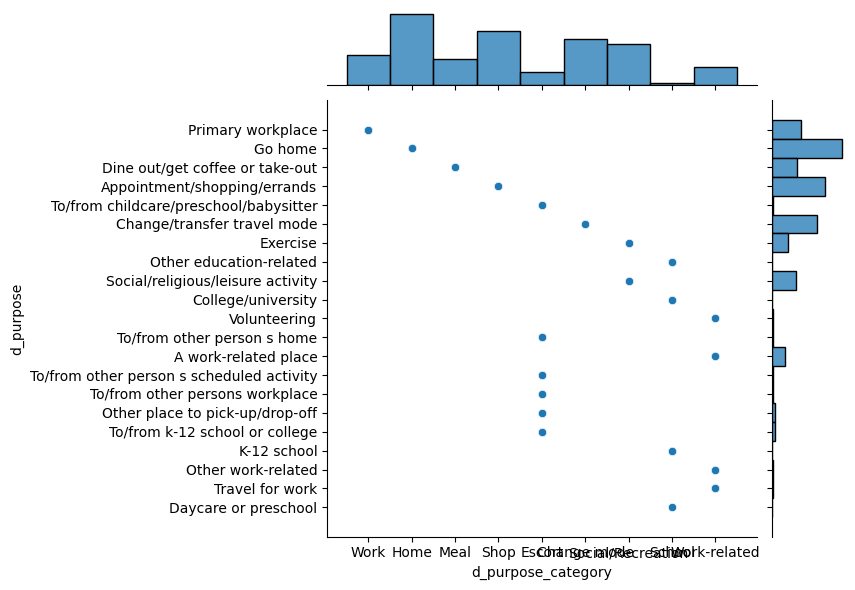

In [11]:
sns.jointplot(x=purpose_dataframe.d_purpose_category,
              y=purpose_dataframe.d_purpose)
